In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import scipy.stats as ss
import warnings
warnings.filterwarnings("ignore")
from scipy.optimize import minimize
# from sklearn.utils import resample
plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
df = pd.read_csv('merged_data.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,SP500,ADS_Index,Returns,Mkt-RF,SMB,HML,RF,Average_OC,Average_all,O-C,H-L,open_tmr,close_tmr,logVol
0,2016-01-06,753.57,765.73,748.00,760.40,16789,1990.26,-0.308089,0.002748,-1.35,-0.12,0.00,0.0,756.985,756.9250,-6.83,17.73,740.00,741.45,9.728479
1,2016-01-07,740.00,755.31,735.28,741.45,22332,1943.09,-0.294335,-0.002893,-2.44,-0.29,0.08,0.0,740.725,743.0100,-1.45,20.03,752.49,730.91,10.013776
2,2016-01-08,752.49,756.25,728.92,730.91,16494,1922.03,-0.281488,-0.024436,-1.11,-0.47,-0.03,0.0,741.700,742.1425,21.58,27.33,732.50,734.56,9.710752
3,2016-01-11,732.50,736.00,719.56,734.56,18012,1923.67,-0.248493,-0.013710,-0.06,-0.65,0.34,0.0,733.530,730.6550,-2.06,16.44,733.99,744.51,9.798793
4,2016-01-12,733.99,748.34,733.99,744.51,15821,1938.68,-0.239263,0.002951,0.71,-0.40,-0.77,0.0,739.250,740.2075,-10.52,14.35,749.43,719.57,9.669093


### AR1 Model

In [39]:
class ar1:
    
    def fit(X,Y):
        
        invXX = np.linalg.inv(X.transpose()@X)
        beta_hat = invXX@X.transpose()@Y
        y_hat = X@beta_hat
        residuals = Y - y_hat
        T = Y.shape[0]
        N = X.shape
        
        sigma2 = (1/T)*residuals.transpose()@residuals
        sigma = np.sqrt(sigma2)
        varcov_beta_hat = (sigma2)*invXX
        std_beta_hat = np.sqrt(T*np.diag(varcov_beta_hat))
        R_square = 1 - (residuals.transpose()@residuals)/(T*np.var(Y))
        adj_R_square = 1-(1-R_square)*(T-1)/(T-N[1])
        t_stat = (beta_hat.transpose()-0)/std_beta_hat
        p_val = 1-ss.norm.cdf(t_stat)
        F_stat = (beta_hat.transpose()@np.linalg.inv(varcov_beta_hat)@beta_hat/N[1])/(residuals.transpose()@residuals/(T-N[1]))
        p_val_F = 1 - ss.f.cdf(F_stat,N[1]-1,T-N[1])
#         rmse = np.sqrt(np.mean((Y-y_hat)**2))
#         ar1.metrics(beta_hat,R_square,adj_R_square,p_val,Y,y_hat,rmse)
        return beta_hat,y_hat
    
    def metrics(beta_hat,R_square,adj_R_square,p_val,Y,y_hat,rmse):
        
        t = PrettyTable(['Metrics', 'Values'])
        t.add_row(['Beta Values', beta_hat])
        t.add_row(['RMSE',rmse])
        t.add_row(['R-Square',R_square])
        t.add_row(['Adjusted R-Square',adj_R_square])
        t.add_row(['P values',p_val])
        print(t)
        plt.plot(Y)
        plt.plot(y_hat)

+-------------------+-------------------------------------------------+
|      Metrics      |                      Values                     |
+-------------------+-------------------------------------------------+
|    Beta Values    |                  [[ 3.45287267]                 |
|                   |                   [ 0.82857828]                 |
|                   |                   [-0.39708389]                 |
|                   |                  [ 0.56275579]]                 |
|        RMSE       |                6.782540633760947                |
|      R-Square     |                  [[0.9980872]]                  |
| Adjusted R-Square |                  [[0.99807854]]                 |
|      P values     | [[0.46637196 0.13827289 0.6559258  0.22384313]] |
+-------------------+-------------------------------------------------+


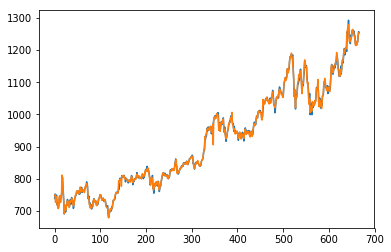

In [32]:
X_ar = df[['High','Close','Low']].as_matrix()[1:]
X_ar = np.column_stack([np.ones((len(X_ar),1)),X_ar])
Y_ar = df[['open_tmr']].as_matrix()[:-1]

y_hat_1 = ar1.fit(X_ar,Y_ar)


### Fama French 5-Factor

In [40]:
class Fama_French_5F:
    
    def fit(X,Y):
        
        invXX = np.linalg.inv(X.transpose()@X)
        beta_hat = invXX@X.transpose()@Y
        y_hat = X@beta_hat
        residuals = Y - y_hat
        T = Y.shape[0]
        N = X.shape
        
        sigma2 = (1/T)*residuals.transpose()@residuals
        sigma = np.sqrt(sigma2)
        varcov_beta_hat = (sigma2)*invXX
        std_beta_hat = np.sqrt(T*np.diag(varcov_beta_hat))
        R_square = 1 - (residuals.transpose()@residuals)/(T*np.var(Y))
        adj_R_square = 1-(1-R_square)*(T-1)/(T-N[1])
        t_stat = (beta_hat.transpose()-0)/std_beta_hat
        p_val = 1-ss.norm.cdf(t_stat)
        F_stat = (beta_hat.transpose()@np.linalg.inv(varcov_beta_hat)@beta_hat/N[1])/(residuals.transpose()@residuals/(T-N[1]))
        p_val_F = 1 - ss.f.cdf(F_stat,N[1]-1,T-N[1])
#         rmse = np.sqrt(np.mean((Y-y_hat)**2))
#         ar1.metrics(beta_hat,R_square,adj_R_square,p_val,Y,y_hat,rmse)
        return beta_hat,y_hat
    
    def metrics(beta_hat,R_square,adj_R_square,p_val,Y,y_hat,rmse):
        
        t = PrettyTable(['Metrics', 'Values'])
        t.add_row(['Beta Values', beta_hat])
        t.add_row(['RMSE',rmse])
        t.add_row(['R-Square',R_square])
        t.add_row(['Adjusted R-Square',adj_R_square])
        t.add_row(['P values',p_val])
        print(t)
        plt.plot(Y)
        plt.plot(y_hat)

+-------------------+-----------------------------------------------------------------------+
|      Metrics      |                                 Values                                |
+-------------------+-----------------------------------------------------------------------+
|    Beta Values    |                             [[-0.5894549 ]                            |
|                   |                              [-3.72138927]                            |
|                   |                              [ 1.01594993]                            |
|                   |                              [ 3.96006382]                            |
|                   |                              [ 1.00096648]                            |
|                   |                             [-1.27663725]]                            |
|        RMSE       |                           5.4625317858530495                          |
|      R-Square     |                             [[0.998759

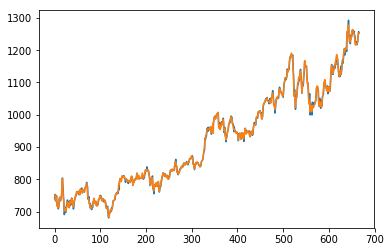

In [33]:
X_FF = df[['Mkt-RF','SMB','HML','Average_all','ADS_Index']].as_matrix()[1:]
X_FF = np.column_stack([np.ones((len(X_FF),1)),X_FF])
Y_FF = df[['open_tmr']].as_matrix()[:-1]

y_hat_2 = Fama_French_5F.fit(X_FF,Y_FF)

### Moving Average Model

In [41]:
class moving_average:
    
    def fit(X,Y):
        
        invXX = np.linalg.inv(X.transpose()@X)
        beta_hat = invXX@X.transpose()@Y
        y_hat = X@beta_hat
        residuals = Y - y_hat
        T = Y.shape[0]
        N = X.shape
        
        sigma2 = (1/T)*residuals.transpose()@residuals
        sigma = np.sqrt(sigma2)
        varcov_beta_hat = (sigma2)*invXX
        std_beta_hat = np.sqrt(T*np.diag(varcov_beta_hat))
        R_square = 1 - (residuals.transpose()@residuals)/(T*np.var(Y))
        adj_R_square = 1-(1-R_square)*(T-1)/(T-N[1])
        t_stat = (beta_hat.transpose()-0)/std_beta_hat
        p_val = 1-ss.norm.cdf(t_stat)
        F_stat = (beta_hat.transpose()@np.linalg.inv(varcov_beta_hat)@beta_hat/N[1])/(residuals.transpose()@residuals/(T-N[1]))
        p_val_F = 1 - ss.f.cdf(F_stat,N[1]-1,T-N[1])
#         rmse = np.sqrt(np.mean((Y-y_hat)**2))
#         ar1.metrics(beta_hat,R_square,adj_R_square,p_val,Y,y_hat,rmse)
        return beta_hat,y_hat
    
    def metrics(beta_hat,R_square,adj_R_square,p_val,Y,y_hat,rmse):
        
        t = PrettyTable(['Metrics', 'Values'])
        t.add_row(['Beta Values', beta_hat])
        t.add_row(['RMSE',rmse])
        t.add_row(['R-Square',R_square])
        t.add_row(['Adjusted R-Square',adj_R_square])
        t.add_row(['P values',p_val])
        print(t)
        plt.plot(Y)
        plt.plot(y_hat)

+-------------------+-------------------------------------------------+
|      Metrics      |                      Values                     |
+-------------------+-------------------------------------------------+
|    Beta Values    |                [[ 4.04186311e-01]               |
|                   |                 [ 1.93004231e+02]               |
|                   |                 [ 5.97735504e-01]               |
|                   |                [-1.37798095e-01]]               |
|        RMSE       |                5.455424723477028                |
|      R-Square     |                  [[0.99876251]]                 |
| Adjusted R-Square |                  [[0.99875691]]                 |
|      P values     | [[0.2695342  0.36251138 0.17991091 0.51668772]] |
+-------------------+-------------------------------------------------+


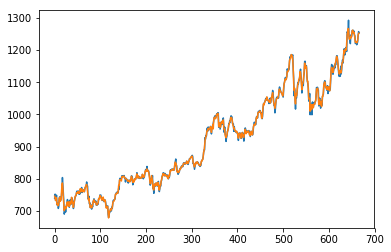

In [31]:
X_EMA = df[['ema','Returns','Average_all','logVol']].as_matrix()[1:]
X_EMA = np.column_stack([np.ones((len(X_EMA),1)),X_EMA])
Y_EMA = df[['open_tmr']].as_matrix()[:-1]

y_hat_3 = moving_average.fit(X_EMA,Y_EMA)

In [42]:
class moving_average:
    
    def fit(X,Y):
        
        invXX = np.linalg.inv(X.transpose()@X)
        beta_hat = invXX@X.transpose()@Y
        y_hat = X@beta_hat
        residuals = Y - y_hat
        T = Y.shape[0]
        N = X.shape
        
        sigma2 = (1/T)*residuals.transpose()@residuals
        sigma = np.sqrt(sigma2)
        varcov_beta_hat = (sigma2)*invXX
        std_beta_hat = np.sqrt(T*np.diag(varcov_beta_hat))
        R_square = 1 - (residuals.transpose()@residuals)/(T*np.var(Y))
        adj_R_square = 1-(1-R_square)*(T-1)/(T-N[1])
        t_stat = (beta_hat.transpose()-0)/std_beta_hat
        p_val = 1-ss.norm.cdf(t_stat)
        F_stat = (beta_hat.transpose()@np.linalg.inv(varcov_beta_hat)@beta_hat/N[1])/(residuals.transpose()@residuals/(T-N[1]))
        p_val_F = 1 - ss.f.cdf(F_stat,N[1]-1,T-N[1])
#         rmse = np.sqrt(np.mean((Y-y_hat)**2))
#         ar1.metrics(beta_hat,R_square,adj_R_square,p_val,Y,y_hat,rmse)
        return beta_hat,y_hat
    
    def metrics(beta_hat,R_square,adj_R_square,p_val,Y,y_hat,rmse):
        
        t = PrettyTable(['Metrics', 'Values'])
        t.add_row(['Beta Values', beta_hat])
        t.add_row(['RMSE',rmse])
        t.add_row(['R-Square',R_square])
        t.add_row(['Adjusted R-Square',adj_R_square])
        t.add_row(['P values',p_val])
        print(t)
        plt.plot(Y)
        plt.plot(y_hat)

+-------------------+---------------------------------------------------------------------+
|      Metrics      |                                Values                               |
+-------------------+---------------------------------------------------------------------+
|    Beta Values    |                            [[ 1.42671597]                           |
|                   |                             [ 0.71559918]                           |
|                   |                             [ 0.52222665]                           |
|                   |                             [-0.24067798]                           |
|                   |                             [-0.99847204]                           |
|                   |                             [-1.88360226]                           |
|                   |                             [ 0.61160868]                           |
|                   |                            [ 3.4082774 ]]                 

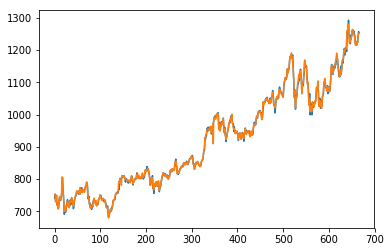

In [36]:
X_ALL = df[['High', 'Low', 'Close', 'ADS_Index','Mkt-RF', 'SMB', 'HML']].as_matrix()[1:]
X_ALL = np.column_stack([np.ones((len(X_ALL),1)),X_ALL])
Y_ALL = df[['open_tmr']].as_matrix()[:-1]

y_hat_4 = moving_average.fit(X_ALL,Y_ALL)

### Random Forest

In [54]:
def Randomforest():
    
    #AR1
    N = df.shape[0] # Total Number of days
    num_boot = 400 #  Number of bootstraps
    T= 250 #Starting Value
    window = 200
    
    Y =df['open_tmr'][-(N-(T+1)):].values
    Y_close = df['close_tmr'][-(N-(T+1)):].values
    
    y_hat_ar = np.zeros(N-(T+1))
    
    for t in range(T+1, N):    
        # training data
        X_train = df[['Open','Close','Low']][t-window:t-1] # regression variables
        X_train = np.column_stack([np.ones((len(X_train),1)),X_train])
        Y_train = df['open_tmr'][t-window:t-1].values
        # one day prediction
        X_pred = df[['Open','Close','Low']][t-1:t]
        X_pred = np.column_stack([np.ones((len(X_pred),1)),X_pred])
        
        yhat_train = ar1.fit(X_train, Y_train)[1]
        
        res_train =  Y_train - yhat_train
        y_pred_all = np.zeros(num_boot)
        # bootstrap method: switching residuals
        for i in range(0, num_boot):
            err = np.random.choice(res_train, (window-1, ), replace=True)
            y_bstr = yhat_train + err   
            beta_bstr = ar1.fit(X_train, y_bstr)[0]
            y_pred_bstr = X_pred@beta_bstr
            y_pred_all[i]=y_pred_bstr         
        y_pred_ar1 = y_pred_all.mean() # get mean of all bootstrap predictions        
        y_hat_ar[t-(T+1)]=y_pred_ar1 # do this for each time step
    rmse_ar1 = np.sqrt(np.mean((y_hat_ar-Y)**2))
    print(rmse_ar1)
    
    #FF
    
    y_hat_FF = np.zeros(N-(T+1))
    
    for t in range(T+1, N):    
        # training data
        X_train = df[['Mkt-RF','SMB','HML','Average_all','ADS_Index']][t-window:t-1] # regression variables
        X_train = np.column_stack([np.ones((len(X_train),1)),X_train])
        Y_train = df['open_tmr'][t-window:t-1].values
        # one day prediction
        X_pred = df[['Mkt-RF','SMB','HML','Average_all','ADS_Index']][t-1:t]
        X_pred = np.column_stack([np.ones((len(X_pred),1)),X_pred])
        
        yhat_train = Fama_French_5F.fit(X_train, Y_train)[1]
        
        res_train =  Y_train - yhat_train
        y_pred_all = np.zeros(num_boot)
        # bootstrap method: switching residuals
        for i in range(0, num_boot):
            err = np.random.choice(res_train, (window-1, ), replace=True)
            y_bstr = yhat_train + err   
            beta_bstr = Fama_French_5F.fit(X_train, y_bstr)[0]
            y_pred_bstr = X_pred@beta_bstr
            y_pred_all[i]=y_pred_bstr         
        y_pred_FF = y_pred_all.mean() # get mean of all bootstrap predictions        
        y_hat_FF[t-(T+1)]=y_pred_FF # do this for each time step
    rmse_FF = np.sqrt(np.mean((y_hat_FF-Y)**2))
    print(rmse_FF)
    
    #MA
    
    y_hat_ma = np.zeros(N-(T+1))
    df['ema'] = df.Average_OC.ewm(span=5,adjust=False).mean()
    for t in range(T+1, N):    
        # training data
        X_train = df[['ema','Open','Returns','Average_all','logVol']][t-window:t-1] # regression variables
        X_train = np.column_stack([np.ones((len(X_train),1)),X_train])
        Y_train = df['open_tmr'][t-window:t-1].values
        # one day prediction
        X_pred = df[['ema','Open','Returns','Average_all','logVol']][t-1:t]
        X_pred = np.column_stack([np.ones((len(X_pred),1)),X_pred])
        
        yhat_train = moving_average.fit(X_train, Y_train)[1]
        
        res_train =  Y_train - yhat_train
        y_pred_all = np.zeros(num_boot)
        # bootstrap method: switching residuals
        for i in range(0, num_boot):
            err = np.random.choice(res_train, (window-1, ), replace=True)
            y_bstr = yhat_train + err   
            beta_bstr = moving_average.fit(X_train, y_bstr)[0]
            y_pred_bstr = X_pred@beta_bstr
            y_pred_all[i]=y_pred_bstr         
        y_pred_ma = y_pred_all.mean() # get mean of all bootstrap predictions        
        y_hat_ma[t-(T+1)]=y_pred_ma # do this for each time step
    rmse_ma = np.sqrt(np.mean((y_hat_ma-Y)**2))
    print(rmse_ma)
    
    #All Features
    
    y_hat_allf = np.zeros(N-(T+1))
    for t in range(T+1, N):    
        # training data
        X_train = df[['High', 'Low', 'Close', 'ADS_Index','Mkt-RF', 'SMB', 'HML', 'Average_all']][t-window:t-1] # regression variables
        X_train = np.column_stack([np.ones((len(X_train),1)),X_train])
        Y_train = df['open_tmr'][t-window:t-1].values
        # one day prediction
        X_pred = df[['High', 'Low', 'Close', 'ADS_Index','Mkt-RF', 'SMB', 'HML', 'Average_all']][t-1:t]
        X_pred = np.column_stack([np.ones((len(X_pred),1)),X_pred])
        
        yhat_train = all_features.fit(X_train, Y_train)[1]
        
        res_train =  Y_train - yhat_train
        y_pred_all = np.zeros(num_boot)
        # bootstrap method: switching residuals
        for i in range(0, num_boot):
            err = np.random.choice(res_train, (window-1, ), replace=True)
            y_bstr = yhat_train + err   
            beta_bstr = all_features.fit(X_train, y_bstr)[0]
            y_pred_bstr = X_pred@beta_bstr
            y_pred_all[i]=y_pred_bstr         
        y_pred_allf = y_pred_all.mean() # get mean of all bootstrap predictions        
        y_hat_allf[t-(T+1)]=y_pred_allf # do this for each time step
    rmse_allf = np.sqrt(np.mean((y_hat_allf-Y)**2))
    print(rmse_allf)
    
    T1 = Y.shape[0]
    Y_rf = np.zeros(T1)
    for t in range(0, T1):
        if min(abs(y_hat_ar[t]-Y[t]),abs(y_hat_ma[t]-Y[t]),
               abs(y_hat_FF[t]-Y[t]))==abs(y_hat_ar[t]-Y[t]):
            Y_rf[t] = y_hat_ar[t]
        elif min(abs(y_hat_ar[t]-Y[t]),abs(y_hat_ma[t]-Y[t]),
                 abs(y_hat_FF[t]-Y[t]))==abs(y_hat_ma[t]-Y[t]):
            Y_rf[t] = y_hat_ma[t]
        elif min(abs(y_hat_ar[t]-Y[t]),abs(y_hat_ma[t]-Y[t]),
                 abs(y_hat_FF[t]-Y[t]))==abs(y_hat_FF[t]-Y[t]):
            Y_rf[t] = y_hat_FF[t]          
        else:
            Y_rf[t] = y_hat_allf[t]  
    rmse_rf=np.sqrt(np.mean((Y-Y_rf)**2))
    
    print("ar1_RMSE: ", rmse_ar1)
    print("ma_RMSE: ", rmse_ma)
    print("ALLF_RMSE: ", rmse_allf)
    print("FF_RMSE: ", rmse_FF)
    print("random forest rmse: ", rmse_rf)
    
    timevec = np.linspace(1,T1,T1)
    plt.figure(figsize=(30,20))
    
    ax = plt.subplot(211)
    ax.plot(timevec, Y, 'blue', label = "Y: original")
    ax.plot(timevec, y_hat_ar, 'red', label = "AR1")
    ax.plot(timevec, y_hat_ma, 'green', label = "Moving Average")
    ax.plot(timevec, y_hat_FF, 'purple', label = "Farma French")
    ax.plot(timevec, y_hat_allf, 'orange', label = "All Features")
    plt.title('Models Prediction using single models')
    ax.legend(loc=2, bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
    
    
    ax = plt.subplot(212)
    ax.plot(timevec, Y, 'blue', label = "Y: original")
    ax.plot(timevec, Y_rf, 'red', label = "Y_rf")
    plt.title('Random Forest Prediction')
    ax.legend(loc=2, bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
    plt.show()
    
    return Y_rf,Y, Y_close

14.550877249994613
15.662693784882377
15.011879479284476
14.590610320733502
ar1_RMSE:  14.550877249994613
ma_RMSE:  15.011879479284476
ALLF_RMSE:  14.590610320733502
FF_RMSE:  15.662693784882377
random forest rmse:  12.777463246145437


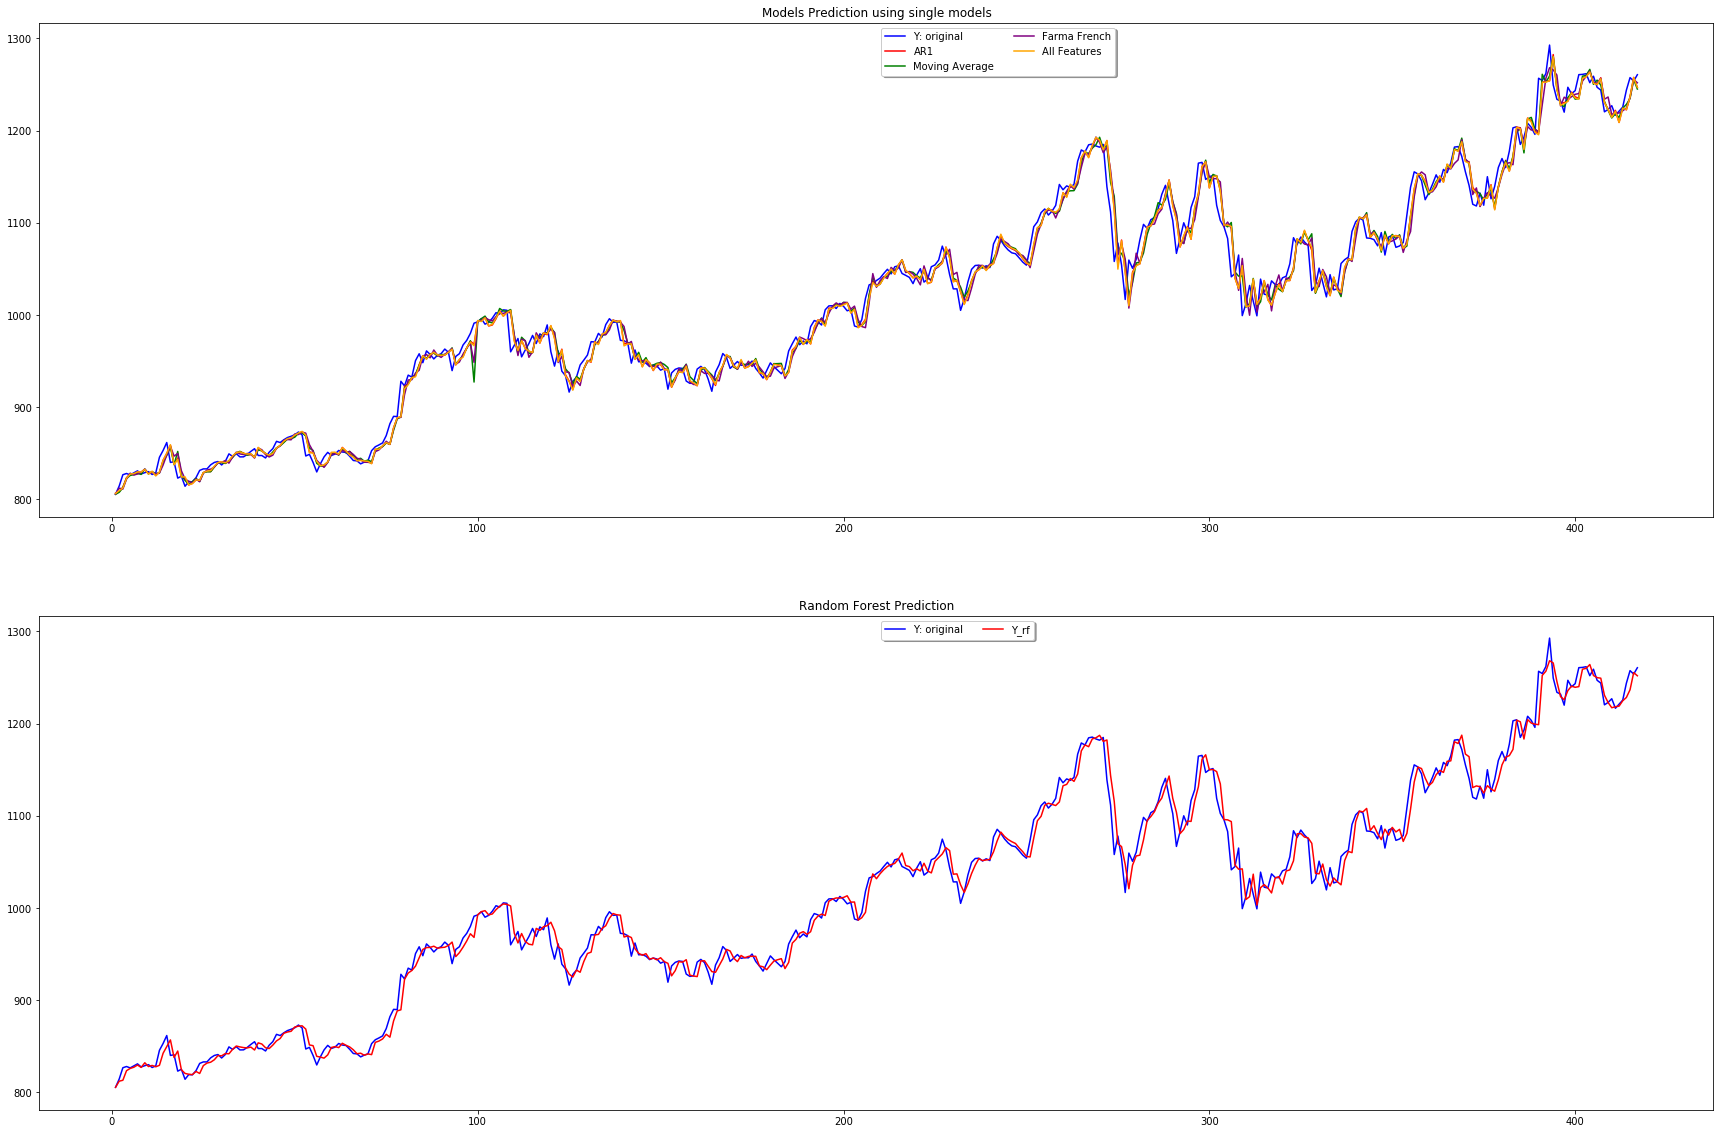

In [55]:
Y_rf,Y, Y_close = Randomforest()

In [56]:
results = np.stack([Y,Y_rf,Y_close],axis=1)

In [58]:
final_results = pd.DataFrame(results,columns=['Y','Y_rf','Y_close'])

In [60]:
final_results = final_results.reindex()

In [62]:
final_results.to_csv('RF_results.csv', index = False)